In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', 41)

In [2]:
data = pd.read_csv('teleom_customer_churn.csv')

In [3]:
data.drop('customerID', axis= 1, inplace=True)

In [4]:
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [5]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
dummies = {'Yes':1,
           'No':0,
           'No phone service': 0,
           'No internet service':0}
for col in ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']:
    data.replace({f'{col}': dummies}, inplace=True)

In [7]:
data.replace({'gender': {'Female': 0,
                         'Male':1}}, inplace=True)

In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:
data = pd.get_dummies(data, drop_first=True)

In [10]:
data["TotalCharges"] = data.groupby(['Churn', 'PhoneService', 
                                     'InternetService_Fiber optic', 
                                     'InternetService_No']).transform(lambda x: x.fillna(x.mean()))

In [11]:
data.isnull().sum()[data.isnull().sum() != 0]

Series([], dtype: int64)

In [12]:
corr = data.corr()

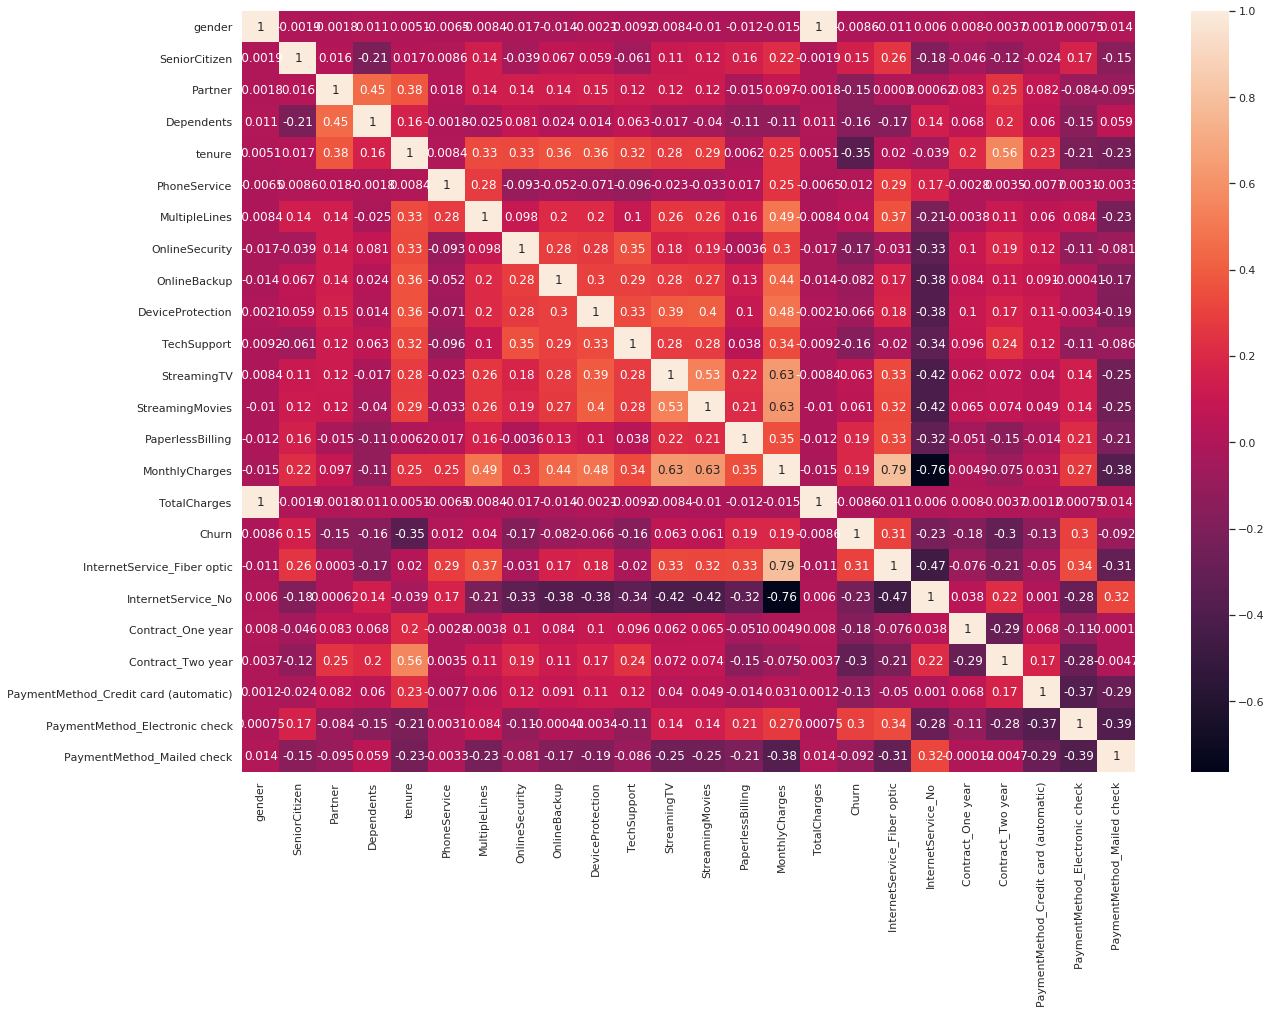

In [13]:
plt.figure(figsize=[20,14])
sns.heatmap(corr, annot=True)
plt.show()

Dropping unnecessary and correlated columns.

In [14]:
data.drop(['gender', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'OnlineBackup', 
           'TotalCharges', 'PhoneService', 'MultipleLines'], axis=1, inplace=True)

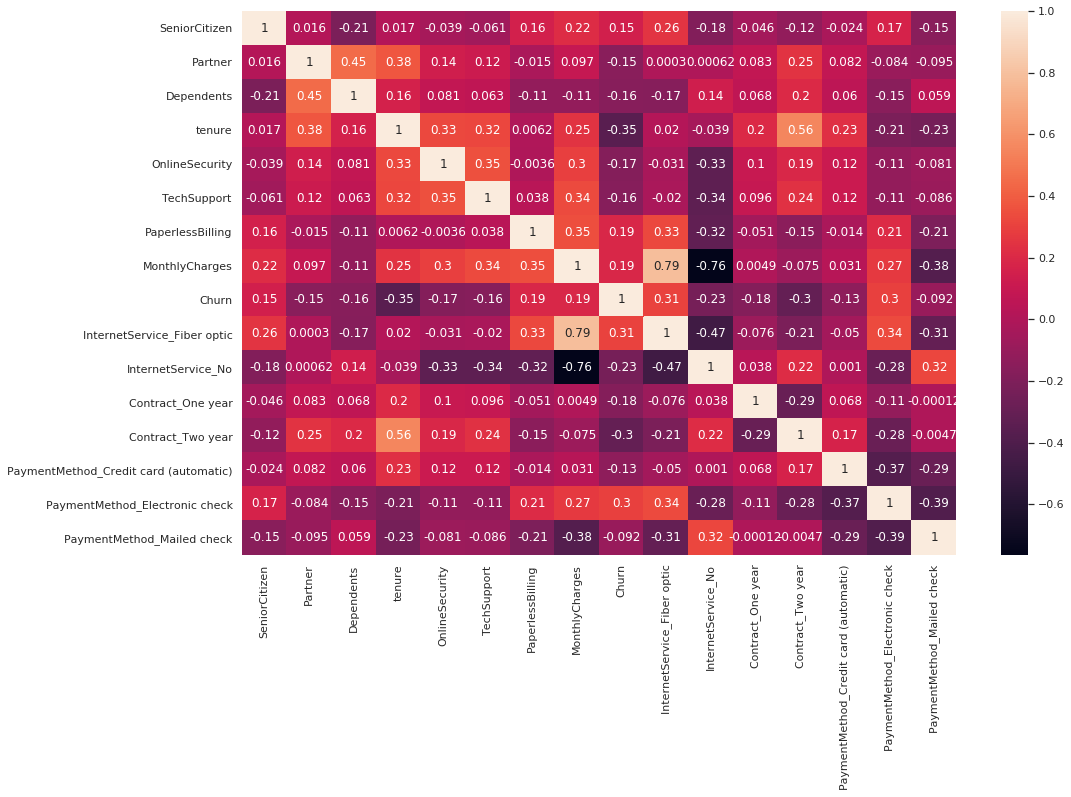

In [15]:
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(), annot=True)
plt.show()

In [17]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,29.85,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,0,56.95,0,0,0,1,0,0,0,1
2,0,0,0,2,1,0,1,53.85,1,0,0,0,0,0,0,1
3,0,0,0,45,1,1,0,42.30,0,0,0,1,0,0,0,0
4,0,0,0,2,0,0,1,70.70,1,1,0,0,0,0,1,0


In [18]:
data.to_csv('final_telecom_churn_data.csv', index=False)